# Final Project - Data Science Programming 
## Joseph Blankenship and Jacob Mitchell

# United States Opioid Epidemic

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
#Number and Age-adjusted rates of drug overdose death by state, US 2019
overdoseByState = pd.read_csv("overdoseDeathByState.csv")

#Statistically Significant drug overdose death rate increase from 2018 to 2018 US States
overdoseByState.describe()

#Taken from cdc I believe
overdoseIncrease = pd.read_csv("overdoseIncreaseRate.csv")
overdoseIncrease.describe()

#Medicare Prescription Rate by State taken from 
# source = https://data.cms.gov/summary-statistics-on-use-and-payments/medicare-medicaid-opioid-prescribing-rates/medicare-part-d-opioid-prescribing-rates-by-geography
medicare = pd.read_csv("medicarePrescriptionRates.csv")
#medicare['Prscrbr_Geo_Desc'].tolist()
#medicare

**A Value of A value of “State” indicates the data in the row is aggregated to the state of the prescriber as determined by the ZIP reference table.** 
This means in order to match our data to the state level given by the CDC datasets about opiod overdose increase rates at the state level, we should probably drop data where the information is lower or higher than state level. 

In [7]:
#Dropping Rows that are lower or higher scale than state
medicare = medicare[medicare['Prscrbr_Geo_Desc'].isin(overdoseByState['Location'].values)]
#RUCA_Cd is only recorded at the ZIPCODE level, so these values are not useful
medicare.drop(columns=['RUCA_Cd'])

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,Prscrbr_Geo_Desc,Breakout_Type,Breakout,Tot_Prscrbrs,Tot_Opioid_Prscrbrs,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
3,2019,State,1.0,Alabama,Totals,Overall,15575.0,9739.0,1814583.0,28008206.0,6.48,-1.40,-0.42,138456.0,7.63,-2.13,-0.73
4,2019,State,2.0,Alaska,Totals,Overall,2847.0,1935.0,80311.0,1639104.0,4.90,-2.01,-0.90,13005.0,16.19,-3.73,-2.42
5,2019,State,4.0,Arizona,Totals,Overall,25876.0,16578.0,1359955.0,25693764.0,5.29,-1.79,-0.33,184250.0,13.55,-2.58,-1.25
6,2019,State,5.0,Arkansas,Totals,Overall,9700.0,7258.0,998319.0,17894303.0,5.58,-1.08,-0.32,76135.0,7.63,-1.69,-0.93
7,2019,State,6.0,California,Totals,Overall,129325.0,80941.0,5888034.0,138971644.0,4.24,-1.29,-0.35,630832.0,10.71,-1.32,-0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179788,2013,State,51.0,Virginia,Rural/Urban,Urban,21921.0,17493.0,1343634.0,22061872.0,6.09,NaN,NaN,177950.5,13.24,NaN,NaN
179789,2013,State,53.0,Washington,Rural/Urban,Urban,22202.0,17452.0,1392563.0,19858703.0,7.01,NaN,NaN,255333.0,18.34,NaN,NaN
179790,2013,State,54.0,West Virginia,Rural/Urban,Urban,5084.0,4006.0,573559.0,8294087.0,6.92,NaN,NaN,55543.0,9.68,NaN,NaN
179791,2013,State,55.0,Wisconsin,Rural/Urban,Urban,15456.0,12276.0,1073521.0,17510059.0,6.13,NaN,NaN,201505.0,18.77,NaN,NaN


In [8]:
#overdoseByState
#overdoseIncrease
#medicare

# Some important visualizations to get an understanding of the data we have collected

[Text(0, 0, 'Alabama'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Arizona'),
 Text(3, 0, 'Arkansas'),
 Text(4, 0, 'California'),
 Text(5, 0, 'Colorado'),
 Text(6, 0, 'Connecticut'),
 Text(7, 0, 'Delaware'),
 Text(8, 0, 'District of Columbia'),
 Text(9, 0, 'Florida'),
 Text(10, 0, 'Georgia'),
 Text(11, 0, 'Hawaii'),
 Text(12, 0, 'Idaho'),
 Text(13, 0, 'Illinois'),
 Text(14, 0, 'Indiana'),
 Text(15, 0, 'Iowa'),
 Text(16, 0, 'Kansas'),
 Text(17, 0, 'Kentucky'),
 Text(18, 0, 'Louisiana'),
 Text(19, 0, 'Maine'),
 Text(20, 0, 'Maryland'),
 Text(21, 0, 'Massachusetts'),
 Text(22, 0, 'Michigan'),
 Text(23, 0, 'Minnesota'),
 Text(24, 0, 'Mississippi'),
 Text(25, 0, 'Missouri'),
 Text(26, 0, 'Montana'),
 Text(27, 0, 'Nebraska'),
 Text(28, 0, 'Nevada'),
 Text(29, 0, 'New Hampshire'),
 Text(30, 0, 'New Jersey'),
 Text(31, 0, 'New Mexico'),
 Text(32, 0, 'New York'),
 Text(33, 0, 'North Carolina'),
 Text(34, 0, 'North Dakota'),
 Text(35, 0, 'Ohio'),
 Text(36, 0, 'Oklahoma'),
 Text(37, 0, 'Oregon'),
 Text(

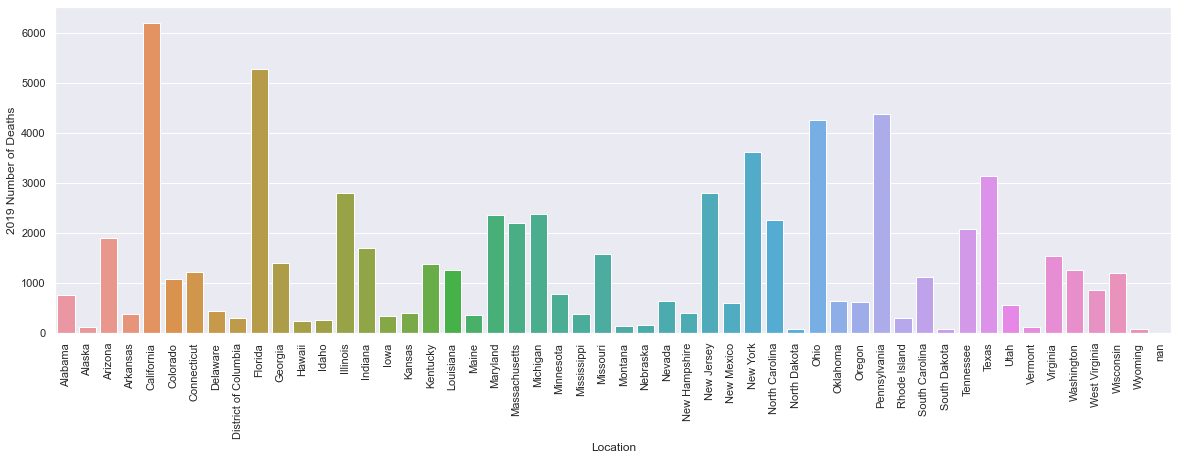

In [9]:
#Below I've parsed information to show a visual representation of how many deaths there were per state in 2019 
overdoseByState['Location'] = overdoseByState['Location'].astype(str)
sns.set(rc={"figure.figsize":(20, 6)})
odBSBar = sns.barplot(data=overdoseByState, x='Location', y='2019 Number of Deaths')
odBSBar.set_xticklabels(labels=overdoseByState['Location'], rotation=90)

## 2019 Number of Deaths in Each State in the United States illustrated above
As garnered by the graph above, we can see that California, Florida, Pennsylvania, Ohio, and New York have among the highest number of deaths by opioid overdose in the year 2019. What can we take away from this information?
**Midwest is plagued, states with higher population more succeptable?** 
What can we see when we compare this visual with how opioids were dispersed?


In [10]:
#Here I'm parsing out medicare information for the state level in just the year 2019
medicare2019 = medicare[medicare['Year']==2019]
medicare2019Overall = medicare2019[medicare2019['Breakout']=='Overall']
medicare2019Overall

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,Prscrbr_Geo_Desc,RUCA_Cd,Breakout_Type,Breakout,Tot_Prscrbrs,Tot_Opioid_Prscrbrs,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
3,2019,State,1.0,Alabama,NaN,Totals,Overall,15575.0,9739.0,1814583.0,28008206.0,6.48,-1.40,-0.42,138456.0,7.63,-2.13,-0.73
4,2019,State,2.0,Alaska,NaN,Totals,Overall,2847.0,1935.0,80311.0,1639104.0,4.90,-2.01,-0.90,13005.0,16.19,-3.73,-2.42
5,2019,State,4.0,Arizona,NaN,Totals,Overall,25876.0,16578.0,1359955.0,25693764.0,5.29,-1.79,-0.33,184250.0,13.55,-2.58,-1.25
6,2019,State,5.0,Arkansas,NaN,Totals,Overall,9700.0,7258.0,998319.0,17894303.0,5.58,-1.08,-0.32,76135.0,7.63,-1.69,-0.93
7,2019,State,6.0,California,NaN,Totals,Overall,129325.0,80941.0,5888034.0,138971644.0,4.24,-1.29,-0.35,630832.0,10.71,-1.32,-0.55
8,2019,State,8.0,Colorado,NaN,Totals,Overall,21262.0,15273.0,986823.0,17403100.0,5.67,-1.81,-0.45,130781.0,13.25,-2.56,-0.95
9,2019,State,9.0,Connecticut,NaN,Totals,Overall,18060.0,10751.0,578122.0,16874265.0,3.43,-1.17,-0.13,83186.0,14.39,-2.38,-0.53
10,2019,State,10.0,Delaware,NaN,Totals,Overall,3759.0,2535.0,181569.0,4294537.0,4.23,-2.38,-0.71,31988.0,17.62,-2.04,-1.66
11,2019,State,11.0,District of Columbia,NaN,Totals,Overall,4957.0,3070.0,75262.0,2071246.0,3.63,-0.96,-0.18,7822.0,10.39,-0.53,0.09
12,2019,State,12.0,Florida,NaN,Totals,Overall,78483.0,45389.0,4865839.0,108893059.0,4.47,-0.84,-0.36,633156.0,13.01,-0.25,-0.75


[Text(0, 0, 'Alabama'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Arizona'),
 Text(3, 0, 'Arkansas'),
 Text(4, 0, 'California'),
 Text(5, 0, 'Colorado'),
 Text(6, 0, 'Connecticut'),
 Text(7, 0, 'Delaware'),
 Text(8, 0, 'District of Columbia'),
 Text(9, 0, 'Florida'),
 Text(10, 0, 'Georgia'),
 Text(11, 0, 'Hawaii'),
 Text(12, 0, 'Idaho'),
 Text(13, 0, 'Illinois'),
 Text(14, 0, 'Indiana'),
 Text(15, 0, 'Iowa'),
 Text(16, 0, 'Kansas'),
 Text(17, 0, 'Kentucky'),
 Text(18, 0, 'Louisiana'),
 Text(19, 0, 'Maine'),
 Text(20, 0, 'Maryland'),
 Text(21, 0, 'Massachusetts'),
 Text(22, 0, 'Michigan'),
 Text(23, 0, 'Minnesota'),
 Text(24, 0, 'Mississippi'),
 Text(25, 0, 'Missouri'),
 Text(26, 0, 'Montana'),
 Text(27, 0, 'Nebraska'),
 Text(28, 0, 'Nevada'),
 Text(29, 0, 'New Hampshire'),
 Text(30, 0, 'New Jersey'),
 Text(31, 0, 'New Mexico'),
 Text(32, 0, 'New York'),
 Text(33, 0, 'North Carolina'),
 Text(34, 0, 'North Dakota'),
 Text(35, 0, 'Ohio'),
 Text(36, 0, 'Oklahoma'),
 Text(37, 0, 'Oregon'),
 Text(

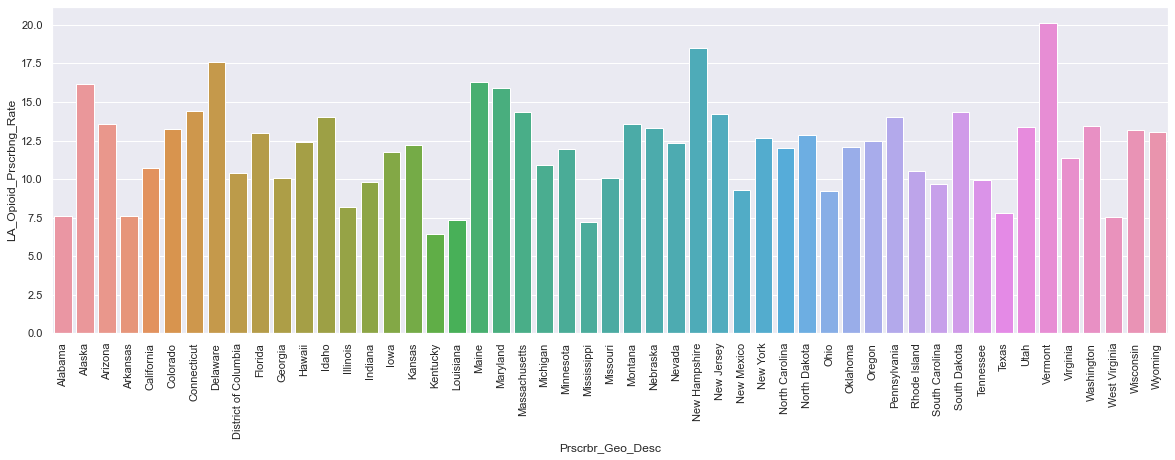

In [11]:
#Same thing happening here for medicare this time instead of overdose deaths
sns.set(rc={"figure.figsize":(20, 6)}) 
presRateBar = sns.barplot(data=medicare2019Overall, x='Prscrbr_Geo_Desc', y='LA_Opioid_Prscrbng_Rate')
presRateBar.set_xticklabels(labels=medicare2019Overall['Prscrbr_Geo_Desc'], rotation=90)

## It seems that the states that have the highest opioid deaths actually aren't the same states that disperse the most opioids
**At least not in 2019**

In [12]:
#Here I'm parsing out medicare information for the state level in just the year 2019
medicare2018 = medicare[medicare['Year']==2018]
medicare2018Overall = medicare2018[medicare2018['Breakout']=='Overall']

[Text(0, 0, 'Alabama'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Arizona'),
 Text(3, 0, 'Arkansas'),
 Text(4, 0, 'California'),
 Text(5, 0, 'Colorado'),
 Text(6, 0, 'Connecticut'),
 Text(7, 0, 'Delaware'),
 Text(8, 0, 'District of Columbia'),
 Text(9, 0, 'Florida'),
 Text(10, 0, 'Georgia'),
 Text(11, 0, 'Hawaii'),
 Text(12, 0, 'Idaho'),
 Text(13, 0, 'Illinois'),
 Text(14, 0, 'Indiana'),
 Text(15, 0, 'Iowa'),
 Text(16, 0, 'Kansas'),
 Text(17, 0, 'Kentucky'),
 Text(18, 0, 'Louisiana'),
 Text(19, 0, 'Maine'),
 Text(20, 0, 'Maryland'),
 Text(21, 0, 'Massachusetts'),
 Text(22, 0, 'Michigan'),
 Text(23, 0, 'Minnesota'),
 Text(24, 0, 'Mississippi'),
 Text(25, 0, 'Missouri'),
 Text(26, 0, 'Montana'),
 Text(27, 0, 'Nebraska'),
 Text(28, 0, 'Nevada'),
 Text(29, 0, 'New Hampshire'),
 Text(30, 0, 'New Jersey'),
 Text(31, 0, 'New Mexico'),
 Text(32, 0, 'New York'),
 Text(33, 0, 'North Carolina'),
 Text(34, 0, 'North Dakota'),
 Text(35, 0, 'Ohio'),
 Text(36, 0, 'Oklahoma'),
 Text(37, 0, 'Oregon'),
 Text(

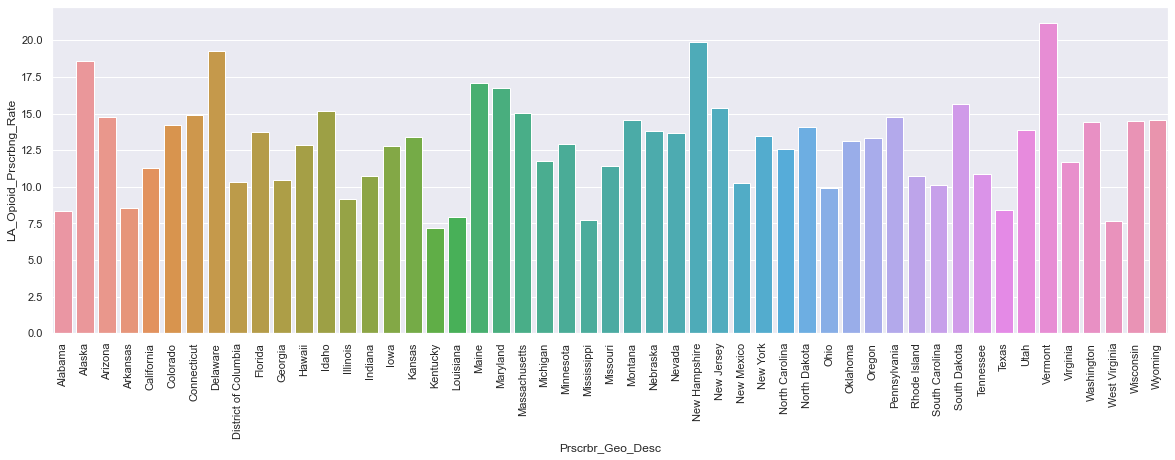

In [13]:
#Same thing happening here for medicare this time instead of overdose deaths
sns.set(rc={"figure.figsize":(20, 6)}) 
presRateBar = sns.barplot(data=medicare2018Overall, x='Prscrbr_Geo_Desc', y='LA_Opioid_Prscrbng_Rate')
presRateBar.set_xticklabels(labels=medicare2018Overall['Prscrbr_Geo_Desc'], rotation=90)

[Text(0, 0, 'Alabama'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Arizona'),
 Text(3, 0, 'Arkansas'),
 Text(4, 0, 'California'),
 Text(5, 0, 'Colorado'),
 Text(6, 0, 'Connecticut'),
 Text(7, 0, 'Delaware'),
 Text(8, 0, 'District of Columbia'),
 Text(9, 0, 'Florida'),
 Text(10, 0, 'Georgia'),
 Text(11, 0, 'Hawaii'),
 Text(12, 0, 'Idaho'),
 Text(13, 0, 'Illinois'),
 Text(14, 0, 'Indiana'),
 Text(15, 0, 'Iowa'),
 Text(16, 0, 'Kansas'),
 Text(17, 0, 'Kentucky'),
 Text(18, 0, 'Louisiana'),
 Text(19, 0, 'Maine'),
 Text(20, 0, 'Maryland'),
 Text(21, 0, 'Massachusetts'),
 Text(22, 0, 'Michigan'),
 Text(23, 0, 'Minnesota'),
 Text(24, 0, 'Mississippi'),
 Text(25, 0, 'Missouri'),
 Text(26, 0, 'Montana'),
 Text(27, 0, 'Nebraska'),
 Text(28, 0, 'Nevada'),
 Text(29, 0, 'New Hampshire'),
 Text(30, 0, 'New Jersey'),
 Text(31, 0, 'New Mexico'),
 Text(32, 0, 'New York'),
 Text(33, 0, 'North Carolina'),
 Text(34, 0, 'North Dakota'),
 Text(35, 0, 'Ohio'),
 Text(36, 0, 'Oklahoma'),
 Text(37, 0, 'Oregon'),
 Text(

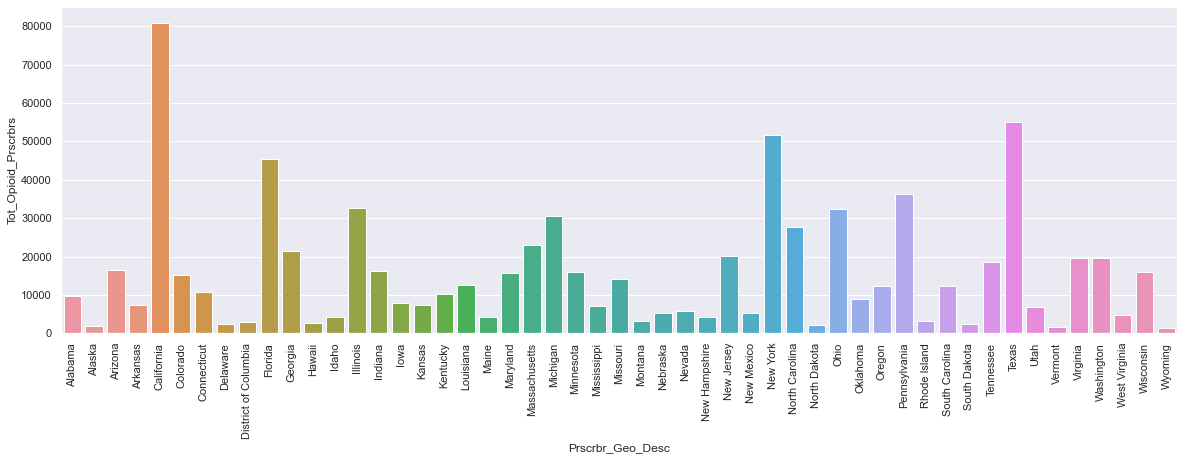

In [14]:
sns.set(rc={"figure.figsize":(20, 6)}) 
presRateBar = sns.barplot(data=medicare2019Overall, x='Prscrbr_Geo_Desc', y='Tot_Opioid_Prscrbrs')
presRateBar.set_xticklabels(labels=medicare2019Overall['Prscrbr_Geo_Desc'], rotation=90)

# Bingo! It looks like there may be a positive correlation between total opioid prescriptions on the state level and deaths per state

# Bayesian Modeling
**p(theta | y) = p(y | theta)p(theta)/p(y)**



In [15]:
result = medicare2019.append([overdoseByState])

In [16]:
horizontal_stack = pd.concat([medicare2019Overall, overdoseByState], axis=1)

In [17]:
#horizontal_stack

#medicare2019.set_index("Prscrbr_Geo_Desc")
#overdoseByState.set_index("Location")
#horizontal_stack_state = pd.merge(medicare2019Overall, overdoseByState, on =  )

In [18]:
#Set the index of our dataframes to the state, then rename "Location" and "Prscrbr_Geo_Desc" as "state" in both files
#This lets us merge them so that the columns align correctly.
medicare2019Overall.rename(columns = {'Prscrbr_Geo_Desc' : 'state'}, inplace = True)
overdoseByState.rename(columns = {'Location' : 'state'}, inplace = True)



C:\ProgramData\Anaconda3\envs\dspEnv\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [19]:
medicare2019Overall.reset_index(drop = True)


#merged_inner = pd.merge(medicare2019Overall, overdoseByState, )
#horizontal_stack_state
#medicare2019.reset_index(drop = True)
#medicare2019.drop(columns = "index")
#overdoseByState.reset_index(drop = True)
#deaths_2019 = overdoseByState["2019 Number of Deaths"]
#medicare2019

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,state,RUCA_Cd,Breakout_Type,Breakout,Tot_Prscrbrs,Tot_Opioid_Prscrbrs,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
0,2019,State,1.0,Alabama,NaN,Totals,Overall,15575.0,9739.0,1814583.0,28008206.0,6.48,-1.40,-0.42,138456.0,7.63,-2.13,-0.73
1,2019,State,2.0,Alaska,NaN,Totals,Overall,2847.0,1935.0,80311.0,1639104.0,4.90,-2.01,-0.90,13005.0,16.19,-3.73,-2.42
2,2019,State,4.0,Arizona,NaN,Totals,Overall,25876.0,16578.0,1359955.0,25693764.0,5.29,-1.79,-0.33,184250.0,13.55,-2.58,-1.25
3,2019,State,5.0,Arkansas,NaN,Totals,Overall,9700.0,7258.0,998319.0,17894303.0,5.58,-1.08,-0.32,76135.0,7.63,-1.69,-0.93
4,2019,State,6.0,California,NaN,Totals,Overall,129325.0,80941.0,5888034.0,138971644.0,4.24,-1.29,-0.35,630832.0,10.71,-1.32,-0.55
5,2019,State,8.0,Colorado,NaN,Totals,Overall,21262.0,15273.0,986823.0,17403100.0,5.67,-1.81,-0.45,130781.0,13.25,-2.56,-0.95
6,2019,State,9.0,Connecticut,NaN,Totals,Overall,18060.0,10751.0,578122.0,16874265.0,3.43,-1.17,-0.13,83186.0,14.39,-2.38,-0.53
7,2019,State,10.0,Delaware,NaN,Totals,Overall,3759.0,2535.0,181569.0,4294537.0,4.23,-2.38,-0.71,31988.0,17.62,-2.04,-1.66
8,2019,State,11.0,District of Columbia,NaN,Totals,Overall,4957.0,3070.0,75262.0,2071246.0,3.63,-0.96,-0.18,7822.0,10.39,-0.53,0.09
9,2019,State,12.0,Florida,NaN,Totals,Overall,78483.0,45389.0,4865839.0,108893059.0,4.47,-0.84,-0.36,633156.0,13.01,-0.25,-0.75


In [20]:
#medicare2019_aug = pd.concat([medicare2019Overall, deaths_2019], axis = 1)
overdoseByState.reset_index(drop = True)

,state,Range Category,2019 Age-adjusted Rate,2019 Number of Deaths
0,Alabama,16.1 to 18.5,16.3,768.0
1,Alaska,16.1 to 18.5,17.8,132.0
2,Arizona,21.1 to 57.0,26.8,1907.0
3,Arkansas,11.1 to 13.5,13.5,388.0
4,California,13.6 to 16.0,15.0,6198.0
5,Colorado,16.1 to 18.5,18.0,1079.0
6,Connecticut,21.1 to 57.0,34.7,1214.0
7,Delaware,21.1 to 57.0,48.0,435.0
8,District of Columbia,21.1 to 57.0,43.2,311.0
9,Florida,21.1 to 57.0,25.5,5268.0


In [21]:
overdoseByState.drop([51]) #This only has NaN values, just drop it.

,state,Range Category,2019 Age-adjusted Rate,2019 Number of Deaths
0,Alabama,16.1 to 18.5,16.3,768.0
1,Alaska,16.1 to 18.5,17.8,132.0
2,Arizona,21.1 to 57.0,26.8,1907.0
3,Arkansas,11.1 to 13.5,13.5,388.0
4,California,13.6 to 16.0,15.0,6198.0
5,Colorado,16.1 to 18.5,18.0,1079.0
6,Connecticut,21.1 to 57.0,34.7,1214.0
7,Delaware,21.1 to 57.0,48.0,435.0
8,District of Columbia,21.1 to 57.0,43.2,311.0
9,Florida,21.1 to 57.0,25.5,5268.0


In [22]:
state_2019 = pd.merge(medicare2019Overall, overdoseByState, left_on = 'state', right_on = 'state')
state_2019

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,state,RUCA_Cd,Breakout_Type,Breakout,Tot_Prscrbrs,Tot_Opioid_Prscrbrs,Tot_Opioid_Clms,...,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg,Range Category,2019 Age-adjusted Rate,2019 Number of Deaths
0,2019,State,1.0,Alabama,NaN,Totals,Overall,15575.0,9739.0,1814583.0,...,6.48,-1.40,-0.42,138456.0,7.63,-2.13,-0.73,16.1 to 18.5,16.3,768.0
1,2019,State,2.0,Alaska,NaN,Totals,Overall,2847.0,1935.0,80311.0,...,4.90,-2.01,-0.90,13005.0,16.19,-3.73,-2.42,16.1 to 18.5,17.8,132.0
2,2019,State,4.0,Arizona,NaN,Totals,Overall,25876.0,16578.0,1359955.0,...,5.29,-1.79,-0.33,184250.0,13.55,-2.58,-1.25,21.1 to 57.0,26.8,1907.0
3,2019,State,5.0,Arkansas,NaN,Totals,Overall,9700.0,7258.0,998319.0,...,5.58,-1.08,-0.32,76135.0,7.63,-1.69,-0.93,11.1 to 13.5,13.5,388.0
4,2019,State,6.0,California,NaN,Totals,Overall,129325.0,80941.0,5888034.0,...,4.24,-1.29,-0.35,630832.0,10.71,-1.32,-0.55,13.6 to 16.0,15.0,6198.0
5,2019,State,8.0,Colorado,NaN,Totals,Overall,21262.0,15273.0,986823.0,...,5.67,-1.81,-0.45,130781.0,13.25,-2.56,-0.95,16.1 to 18.5,18.0,1079.0
6,2019,State,9.0,Connecticut,NaN,Totals,Overall,18060.0,10751.0,578122.0,...,3.43,-1.17,-0.13,83186.0,14.39,-2.38,-0.53,21.1 to 57.0,34.7,1214.0
7,2019,State,10.0,Delaware,NaN,Totals,Overall,3759.0,2535.0,181569.0,...,4.23,-2.38,-0.71,31988.0,17.62,-2.04,-1.66,21.1 to 57.0,48.0,435.0
8,2019,State,11.0,District of Columbia,NaN,Totals,Overall,4957.0,3070.0,75262.0,...,3.63,-0.96,-0.18,7822.0,10.39,-0.53,0.09,21.1 to 57.0,43.2,311.0
9,2019,State,12.0,Florida,NaN,Totals,Overall,78483.0,45389.0,4865839.0,...,4.47,-0.84,-0.36,633156.0,13.01,-0.25,-0.75,21.1 to 57.0,25.5,5268.0


In [23]:
#Relevant operations (save for later/reference)
#merged_inner = pd.merge(medicare2019Overall, overdoseByState, )
#horizontal_stack_state
#medicare2019.reset_index(drop = True)
#medicare2019.drop(columns = "index")
#overdoseByState.reset_index(drop = True)
#deaths_2019 = overdoseByState["2019 Number of Deaths"]
#medicare2019
#overdoseByState.drop([51])
#overdoseByState.rename(columns = {'Location' : 'state'}, inplace = True)
#medicare2019.rename(columns = {'Prscrbr_Geo_Desc' : 'state'}, inplace = True)
#horizontal_stack_state = pd.concat([medicare2019Overall, overdoseByState], ignore_index = True)

In [24]:
#Get 2018 medicare data
medicare2018 = medicare[medicare['Year']==2018]
medicare2018Overall = medicare2018[medicare2018['Breakout']=='Overall']
#medicare2018Overall

In [25]:
medicare2018Overall.rename(columns = {'Prscrbr_Geo_Desc' : 'state'}, inplace = True)

C:\ProgramData\Anaconda3\envs\dspEnv\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [26]:
#Get 2017 medicare data
medicare2017 = medicare[medicare['Year']==2017]
medicare2017Overall = medicare2017[medicare2017['Breakout']=='Overall']
#medicare2017Overall

In [27]:
#Read in the remaining data
overdoseByState2018 = pd.read_csv("overdoseDeath2018.csv")
overdoseByState2017 = pd.read_csv("overdoseDeath2017.csv")
population = pd.read_csv("statePopulations.csv")

In [28]:
#population = pd.read_csv("statePopulations.csv")
#population.iloc[16]

In [29]:
#population
medicare2018Overall.rename(columns = {'Prscrbr_Geo_Desc' : 'state'}, inplace = True)
medicare2017Overall.rename(columns = {'Prscrbr_Geo_Desc' : 'state'}, inplace = True)

In [30]:
medicare2018Overall.reset_index(drop = True)
medicare2017Overall.reset_index(drop = True)

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,state,RUCA_Cd,Breakout_Type,Breakout,Tot_Prscrbrs,Tot_Opioid_Prscrbrs,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
0,2017,State,1.0,Alabama,NaN,Totals,Overall,14415.0,9932.0,2051853.0,28457799.0,7.21,NaN,-0.26,191462.0,9.33,NaN,-0.63
1,2017,State,2.0,Alaska,NaN,Totals,Overall,2461.0,1831.0,78398.0,1227513.0,6.39,NaN,-0.55,15157.0,19.33,NaN,0.04
2,2017,State,4.0,Arizona,NaN,Totals,Overall,22950.0,17110.0,1552551.0,25057852.0,6.20,NaN,-0.39,244929.0,15.78,NaN,-0.58
3,2017,State,5.0,Arkansas,NaN,Totals,Overall,8989.0,7079.0,1130357.0,18228050.0,6.20,NaN,-0.19,107547.0,9.51,NaN,-0.29
4,2017,State,6.0,California,NaN,Totals,Overall,119832.0,83794.0,6809889.0,139049933.0,4.90,NaN,-0.17,807153.0,11.85,NaN,-0.52
5,2017,State,8.0,Colorado,NaN,Totals,Overall,20053.0,15291.0,1127939.0,16928325.0,6.66,NaN,-0.45,171282.0,15.19,NaN,-0.77
6,2017,State,9.0,Connecticut,NaN,Totals,Overall,17452.0,11657.0,641082.0,16625633.0,3.86,NaN,-0.28,102513.0,15.99,NaN,-0.76
7,2017,State,10.0,Delaware,NaN,Totals,Overall,3525.0,2612.0,222382.0,4049166.0,5.49,NaN,-0.52,43674.0,19.64,NaN,0.52
8,2017,State,11.0,District of Columbia,NaN,Totals,Overall,4806.0,3189.0,80911.0,2050753.0,3.95,NaN,-0.28,8081.0,9.99,NaN,-0.68
9,2017,State,12.0,Florida,NaN,Totals,Overall,70945.0,44994.0,5563661.0,107515188.0,5.17,NaN,-0.04,775968.0,13.95,NaN,-0.32


In [31]:
state_2018 = pd.merge(medicare2018Overall, overdoseByState2018, left_on = 'state', right_on = 'state')

In [32]:
state_2018

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,state,RUCA_Cd,Breakout_Type,Breakout,Tot_Prscrbrs,Tot_Opioid_Prscrbrs,Tot_Opioid_Clms,...,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg,range_category,2018_age_adjusted_rate,2018_num_deaths
0,2018,State,1.0,Alabama,NaN,Totals,Overall,15088.0,9869.0,1938707.0,...,6.90,-0.88,-0.31,162063.0,8.36,-1.36,-0.97,16.1 to 18.5,16.6,775
1,2018,State,2.0,Alaska,NaN,Totals,Overall,2550.0,1792.0,72081.0,...,5.80,-1.12,-0.59,13417.0,18.61,-0.96,-0.72,13.6 to 16.0,14.6,110
2,2018,State,4.0,Arizona,NaN,Totals,Overall,24827.0,17019.0,1421243.0,...,5.62,-1.46,-0.58,210345.0,14.80,-1.44,-0.98,21.1 to 57.0,23.8,"1,670"
3,2018,State,5.0,Arkansas,NaN,Totals,Overall,9346.0,7116.0,1065054.0,...,5.90,-0.87,-0.30,91167.0,8.56,-0.76,-0.95,13.6 to 16.0,15.7,444
4,2018,State,6.0,California,NaN,Totals,Overall,124667.0,83030.0,6399200.0,...,4.59,-0.96,-0.31,720716.0,11.26,-0.67,-0.59,11.1 to 13.5,12.8,"5,348"
5,2018,State,8.0,Colorado,NaN,Totals,Overall,21108.0,15451.0,1050236.0,...,6.12,-1.52,-0.54,149149.0,14.20,-2.17,-0.99,16.1 to 18.5,16.8,995
6,2018,State,9.0,Connecticut,NaN,Totals,Overall,17737.0,11023.0,599086.0,...,3.56,-1.06,-0.30,89357.0,14.92,-2.03,-1.07,21.1 to 57.0,30.7,"1,069"
7,2018,State,10.0,Delaware,NaN,Totals,Overall,3643.0,2552.0,207167.0,...,4.94,-1.73,-0.55,39941.0,19.28,0.19,-0.36,21.1 to 57.0,43.8,401
8,2018,State,12.0,Florida,NaN,Totals,Overall,75094.0,45907.0,5170763.0,...,4.83,-0.44,-0.34,711359.0,13.76,0.82,-0.19,21.1 to 57.0,22.8,"4,698"
9,2018,State,13.0,Georgia,NaN,Totals,Overall,30991.0,21722.0,2644972.0,...,5.50,-1.13,-0.26,276313.0,10.45,0.15,-0.20,11.1 to 13.5,13.2,"1,404"


In [33]:
state_2017 = pd.merge(medicare2017Overall, overdoseByState2017, left_on = 'state', right_on = 'state')

In [34]:
state_2017

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,state,RUCA_Cd,Breakout_Type,Breakout,Tot_Prscrbrs,Tot_Opioid_Prscrbrs,Tot_Opioid_Clms,...,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg,range_category,2017_age_adjusted_rate,2017_num_deaths
0,2017,State,1.0,Alabama,NaN,Totals,Overall,14415.0,9932.0,2051853.0,...,7.21,NaN,-0.26,191462.0,9.33,NaN,-0.63,16.1 to 18.5,18.0,835
1,2017,State,2.0,Alaska,NaN,Totals,Overall,2461.0,1831.0,78398.0,...,6.39,NaN,-0.55,15157.0,19.33,NaN,0.04,18.6 to 21.0,20.2,147
2,2017,State,4.0,Arizona,NaN,Totals,Overall,22950.0,17110.0,1552551.0,...,6.20,NaN,-0.39,244929.0,15.78,NaN,-0.58,21.1 to 57.0,22.2,"1,532"
3,2017,State,5.0,Arkansas,NaN,Totals,Overall,8989.0,7079.0,1130357.0,...,6.20,NaN,-0.19,107547.0,9.51,NaN,-0.29,13.6 to 16.0,15.5,446
4,2017,State,6.0,California,NaN,Totals,Overall,119832.0,83794.0,6809889.0,...,4.90,NaN,-0.17,807153.0,11.85,NaN,-0.52,11.1 to 13.5,11.7,"4,868"
5,2017,State,8.0,Colorado,NaN,Totals,Overall,20053.0,15291.0,1127939.0,...,6.66,NaN,-0.45,171282.0,15.19,NaN,-0.77,16.1 to 18.5,17.6,"1,015"
6,2017,State,9.0,Connecticut,NaN,Totals,Overall,17452.0,11657.0,641082.0,...,3.86,NaN,-0.28,102513.0,15.99,NaN,-0.76,21.1 to 57.0,30.9,"1,072"
7,2017,State,10.0,Delaware,NaN,Totals,Overall,3525.0,2612.0,222382.0,...,5.49,NaN,-0.52,43674.0,19.64,NaN,0.52,21.1 to 57.0,37.0,338
8,2017,State,12.0,Florida,NaN,Totals,Overall,70945.0,44994.0,5563661.0,...,5.17,NaN,-0.04,775968.0,13.95,NaN,-0.32,21.1 to 57.0,25.1,"5,088"
9,2017,State,13.0,Georgia,NaN,Totals,Overall,29439.0,21545.0,2783756.0,...,5.76,NaN,-0.21,296460.0,10.65,NaN,0.08,13.6 to 16.0,14.7,"1,537"


In [35]:
#DATAFRAMES WE HAVE SO FAR:
#state_2017,state_2018,state_2019   this is medicaid prescription data and deaths by state combined
#population    this is total population estimates from 2010 to 2019
#medicaidOverall2017, medicaidOverall2018, medicaidOverall2019  this is just the medicaid information by state for the respective years
#overdoseByState, this is the 2019 death information
#overdoseByState2017, overdoseByState2018, overdoseByState2019

In [36]:
#For now, we don't need the totals. We just want the populations per state. This also drops Puerto Rico. We don't have that information
#from the other data sets.
population_states = population.iloc[5:55,0:]


# Beginning of Normalization of 2017 Stats

In [37]:
#Drop district of columbia. We don't have that medicaid info.
population_states.drop([13])

,Location,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
5,Alabama,"4,779,736","4,780,125","4,785,437","4,799,069","4,815,588","4,830,081","4,841,799","4,852,347","4,863,525","4,874,486","4,887,681","4,903,185"
6,Alaska,"710,231","710,249","713,910","722,128","730,443","737,068","736,283","737,498","741,456","739,700","735,139","731,545"
7,Arizona,"6,392,017","6,392,288","6,407,172","6,472,643","6,554,978","6,632,764","6,730,413","6,829,676","6,941,072","7,044,008","7,158,024","7,278,717"
8,Arkansas,"2,915,918","2,916,031","2,921,964","2,940,667","2,952,164","2,959,400","2,967,392","2,978,048","2,989,918","3,001,345","3,009,733","3,017,804"
9,California,"37,253,956","37,254,519","37,319,502","37,638,369","37,948,800","38,260,787","38,596,972","38,918,045","39,167,117","39,358,497","39,461,588","39,512,223"
10,Colorado,"5,029,196","5,029,319","5,047,349","5,121,108","5,192,647","5,269,035","5,350,101","5,450,623","5,539,215","5,611,885","5,691,287","5,758,736"
11,Connecticut,"3,574,097","3,574,147","3,579,114","3,588,283","3,594,547","3,594,841","3,594,524","3,587,122","3,578,141","3,573,297","3,571,520","3,565,287"
12,Delaware,"897,934","897,937","899,593","907,381","915,179","923,576","932,487","941,252","948,921","956,823","965,479","973,764"
14,Florida,"18,801,310","18,804,564","18,845,537","19,053,237","19,297,822","19,545,621","19,845,911","20,209,042","20,613,477","20,963,613","21,244,317","21,477,737"
15,Georgia,"9,687,653","9,688,729","9,711,881","9,802,431","9,901,430","9,972,479","10,067,278","10,178,447","10,301,890","10,410,330","10,511,131","10,617,423"


In [38]:
population_states.reset_index(drop = True)

,Location,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,"4,779,736","4,780,125","4,785,437","4,799,069","4,815,588","4,830,081","4,841,799","4,852,347","4,863,525","4,874,486","4,887,681","4,903,185"
1,Alaska,"710,231","710,249","713,910","722,128","730,443","737,068","736,283","737,498","741,456","739,700","735,139","731,545"
2,Arizona,"6,392,017","6,392,288","6,407,172","6,472,643","6,554,978","6,632,764","6,730,413","6,829,676","6,941,072","7,044,008","7,158,024","7,278,717"
3,Arkansas,"2,915,918","2,916,031","2,921,964","2,940,667","2,952,164","2,959,400","2,967,392","2,978,048","2,989,918","3,001,345","3,009,733","3,017,804"
4,California,"37,253,956","37,254,519","37,319,502","37,638,369","37,948,800","38,260,787","38,596,972","38,918,045","39,167,117","39,358,497","39,461,588","39,512,223"
5,Colorado,"5,029,196","5,029,319","5,047,349","5,121,108","5,192,647","5,269,035","5,350,101","5,450,623","5,539,215","5,611,885","5,691,287","5,758,736"
6,Connecticut,"3,574,097","3,574,147","3,579,114","3,588,283","3,594,547","3,594,841","3,594,524","3,587,122","3,578,141","3,573,297","3,571,520","3,565,287"
7,Delaware,"897,934","897,937","899,593","907,381","915,179","923,576","932,487","941,252","948,921","956,823","965,479","973,764"
8,District of Columbia,"601,723","601,767","605,226","619,800","634,924","650,581","662,328","675,400","685,815","694,906","701,547","705,749"
9,Florida,"18,801,310","18,804,564","18,845,537","19,053,237","19,297,822","19,545,621","19,845,911","20,209,042","20,613,477","20,963,613","21,244,317","21,477,737"


In [39]:
stats_by_pop_2017 = {} #this is in alphabetical order

#Was having a lot of trouble trying to iterate through the dataframe. Instead, I pulled our the series that we want.
#It is a little easier with this.
pop_2017 = population_states['2017']
deaths_2017 = state_2017['2017_num_deaths']
LAprs_2017 = state_2017['LA_Tot_Opioid_Clms']
state_list = state_2017['state']


In [40]:
#Set the state names as the key for this dictionary
for row in state_list:
    state = row
    stats_by_pop_2017[state] = {} #creating dict inside dict
    

In [41]:
normalized_deaths = [] 
size_A = pop_2017.size

#I think we need to get the comma out of our numbers so they're more workable
#I tried your usual str -> int conversion int(pop), but there was an error
#that had something to do with the base of the number, base 2, 10 etc.
#It only really worked when I removed the commas from the strings
for x in range(size_A):
    pop = pop_2017.iloc[x]
    pop = int(pop.replace(',',''))
    deaths = deaths_2017.iloc[x]
    deaths = int(deaths.replace(',',''))
    stat = (deaths/pop) * 100000 #multiplied by large integer so we are not dealing with super small vals like 0.0003
    normalized_deaths.append(stat)



In [42]:
normalized_deaths

[17.13001124631397,
 19.872921454643773,
 21.74898154573362,
 14.860004431346612,
 12.368358476696912,
 18.08661439070829,
 30.000305040415054,
 35.32523779215173,
 732.1853603221155,
 7.331751449523516,
 1.9499862156146825,
 16.568461091847546,
 161.7264796546575,
 14.492721867764399,
 5.121598154902961,
 10.599863124890579,
 53.83815137802977,
 24.886192834752983,
 9.078140522763865,
 168.36353936574824,
 35.99016445911497,
 39.2723449657125,
 7.349760566258442,
 6.359780318096808,
 45.74185798274056,
 1.9486888926370673,
 14.44205221561984,
 35.28281314671022,
 15.724408693207359,
 199.0677549531542,
 5.548349703590953,
 187.4476523388648,
 12.322882807240504,
 0.6622366282494758,
 677.0056507652243,
 6.64685475121466,
 13.481490676404542,
 130.03107182720444,
 2.5024162001419965,
 95.48411297816654,
 1.4538160480579805,
 203.46719091546487,
 44.553429011660654,
 2.297203494025309,
 4.321128188525019,
 241.3733454633984,
 13.812110633470182,
 13.120739632527687,
 64.77696251631808,


In [43]:
normalized_LA_pres = []
size_A = pop_2017.size

#Same as above but for a different stat
for x in range(size_A):
    pop = pop_2017.iloc[x]
    pop = int(pop.replace(',',''))
    pres = LAprs_2017.iloc[x]
    #pres = int(pres.replace(',',''))
    stat = (pres/pop) * 100000 
    normalized_LA_pres.append(stat)

In [44]:
normalized_LA_pres

[3927.8397763374433,
 2049.0739488982017,
 3477.1255228557375,
 3583.2934900852783,
 2050.7719082870462,
 3052.1295429254164,
 2868.863125567228,
 4564.48057791253,
 111665.17485818226,
 1414.1646289692526,
 204.3162896853414,
 4984.017753527292,
 13703.670282904906,
 1801.8162541979593,
 1482.4999046271312,
 3743.1204341805797,
 4491.1882141892065,
 2830.7595140274575,
 1368.0800589222706,
 13725.037688856386,
 3203.473250077857,
 5592.154510874897,
 1369.1009648541067,
 1555.4333902839085,
 7979.795951828837,
 647.2103454092,
 5842.570229229574,
 5085.944444183477,
 1870.0934878388364,
 16859.593101060436,
 534.7461179840245,
 18807.391202915787,
 2056.354268485294,
 221.9077031072435,
 40911.88462160007,
 1517.103858177561,
 4150.391370218013,
 12467.634016109083,
 185.3351998230166,
 14393.18804213047,
 661.5659630196994,
 37677.976509621156,
 6665.857778717174,
 293.64268724320135,
 918.6589539903039,
 29121.60603769717,
 2840.013341860845,
 707.792506953049,
 11842.571617894073,


In [45]:
#Read in the stats for each state. This is a dict inside of a dict
count = 0
for row in state_list:
    state = row
    stats_by_pop_2017[state] = {'Normalized Death Rate' : [normalized_deaths[count]], 'Normalized Long-Acting Rate' : [normalized_LA_pres[count]]}
    count += 1


In [46]:
norm_stats = pd.DataFrame
frames = []
for row in state_list:
    df = pd.DataFrame.from_dict(stats_by_pop_2017[row])
    frames.append(df)

norm_stats = pd.concat(frames, sort = False)

In [47]:
norm_stats.reset_index(drop = True)

,Normalized Death Rate,Normalized Long-Acting Rate
0,17.130011,3927.839776
1,19.872921,2049.073949
2,21.748982,3477.125523
3,14.860004,3583.293490
4,12.368358,2050.771908
5,18.086614,3052.129543
6,30.000305,2868.863126
7,35.325238,4564.480578
8,732.185360,111665.174858
9,7.331751,1414.164629


In [48]:

#state_2017 = pd.merge(state_2017, norm_stats, left_index = True, right_index = True)

In [49]:
norm_stats.index = state_list
state_2017 = pd.merge(state_2017, norm_stats, on='state')
state_2017.index = state_list
state_2017

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,state,RUCA_Cd,Breakout_Type,Breakout,Tot_Prscrbrs,Tot_Opioid_Prscrbrs,Tot_Opioid_Clms,...,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg,range_category,2017_age_adjusted_rate,2017_num_deaths,Normalized Death Rate,Normalized Long-Acting Rate
state,,,,,,,,,,,,,,,,,,,,,
Alabama,2017,State,1.0,Alabama,NaN,Totals,Overall,14415.0,9932.0,2051853.0,...,-0.26,191462.0,9.33,NaN,-0.63,16.1 to 18.5,18.0,835,17.130011,3927.839776
Alaska,2017,State,2.0,Alaska,NaN,Totals,Overall,2461.0,1831.0,78398.0,...,-0.55,15157.0,19.33,NaN,0.04,18.6 to 21.0,20.2,147,19.872921,2049.073949
Arizona,2017,State,4.0,Arizona,NaN,Totals,Overall,22950.0,17110.0,1552551.0,...,-0.39,244929.0,15.78,NaN,-0.58,21.1 to 57.0,22.2,"1,532",21.748982,3477.125523
Arkansas,2017,State,5.0,Arkansas,NaN,Totals,Overall,8989.0,7079.0,1130357.0,...,-0.19,107547.0,9.51,NaN,-0.29,13.6 to 16.0,15.5,446,14.860004,3583.293490
California,2017,State,6.0,California,NaN,Totals,Overall,119832.0,83794.0,6809889.0,...,-0.17,807153.0,11.85,NaN,-0.52,11.1 to 13.5,11.7,"4,868",12.368358,2050.771908
Colorado,2017,State,8.0,Colorado,NaN,Totals,Overall,20053.0,15291.0,1127939.0,...,-0.45,171282.0,15.19,NaN,-0.77,16.1 to 18.5,17.6,"1,015",18.086614,3052.129543
Connecticut,2017,State,9.0,Connecticut,NaN,Totals,Overall,17452.0,11657.0,641082.0,...,-0.28,102513.0,15.99,NaN,-0.76,21.1 to 57.0,30.9,"1,072",30.000305,2868.863126
Delaware,2017,State,10.0,Delaware,NaN,Totals,Overall,3525.0,2612.0,222382.0,...,-0.52,43674.0,19.64,NaN,0.52,21.1 to 57.0,37.0,338,35.325238,4564.480578
Florida,2017,State,12.0,Florida,NaN,Totals,Overall,70945.0,44994.0,5563661.0,...,-0.04,775968.0,13.95,NaN,-0.32,21.1 to 57.0,25.1,"5,088",732.185360,111665.174858


# Repeating the Process for 2018

In [50]:
stats_by_pop_2018 = {} #this is in alphabetical order

#Was having a lot of trouble trying to iterate through the dataframe. Instead, I pulled our the series that we want.
#It is a little easier with this.
pop_2018 = population_states['2018']
deaths_2018 = state_2018['2018_num_deaths']
LAprs_2018 = state_2018['LA_Tot_Opioid_Clms']
state_list = state_2018['state']


In [51]:
#Set the state names as the key for this dictionary
for row in state_list:
    state = row
    stats_by_pop_2018[state] = {} #creating dict inside dict

In [52]:
normalized_deaths2018 = [] 
size_B = pop_2018.size

#I think we need to get the comma out of our numbers so they're more workable
#I tried your usual str -> int conversion int(pop), but there was an error
#that had something to do with the base of the number, base 2, 10 etc.
#It only really worked when I removed the commas from the strings
for x in range(size_B):
    pop = pop_2018.iloc[x]
    pop = int(pop.replace(',',''))
    deaths = deaths_2018.iloc[x]
    deaths = int(deaths.replace(',',''))
    stat = (deaths/pop) * 100000 #multiplied by large integer so we are not dealing with super small vals like 0.0003
    normalized_deaths2018.append(stat)

#normalized_deaths2018

In [53]:
normalized_LA_pres2018 = []
size_B = pop_2018.size

#Same as above but for a different stat
for x in range(size_B):
    pop = pop_2018.iloc[x]
    pop = int(pop.replace(',',''))
    pres = LAprs_2018.iloc[x]
    #pres = int(pres.replace(',',''))
    stat = (pres/pop) * 100000 
    normalized_LA_pres2018.append(stat)
#normalized_LA_pres2018

In [54]:
#Read in the stats for each state. This is a dict inside of a dict
count = 0
for row in state_list:
    state = row
    stats_by_pop_2018[state] = {'Normalized Death Rate ' : [normalized_deaths2018[count]], 'Normalized Long-Acting Rate' : [normalized_LA_pres2018[count]]}
    count += 1

In [55]:
norm_stats2018 = pd.DataFrame
frames = []
for row in state_list:
    df = pd.DataFrame.from_dict(stats_by_pop_2018[row])
    frames.append(df)
    
norm_stats2018 = pd.concat(frames, sort = False)

In [56]:
norm_stats2018.reset_index(drop = True)

,Normalized Death Rate,Normalized Long-Acting Rate
0,15.856190,3315.744215
1,14.963157,1825.097022
2,23.330461,2938.590315
3,14.752139,3029.072679
4,13.552420,1826.373536
5,17.482865,2620.655047
6,29.931234,2501.931951
7,41.533788,4136.910280
8,669.662902,101398.623328
9,6.608826,1300.644309


In [57]:
norm_stats2018

,Normalized Death Rate,Normalized Long-Acting Rate
0,15.856190,3315.744215
0,14.963157,1825.097022
0,23.330461,2938.590315
0,14.752139,3029.072679
0,13.552420,1826.373536
0,17.482865,2620.655047
0,29.931234,2501.931951
0,41.533788,4136.910280
0,669.662902,101398.623328
0,6.608826,1300.644309


In [58]:
norm_stats2018.index = state_list
state_2018 = pd.merge(state_2018, norm_stats2018, on='state')
state_2018.index = state_list
state_2018

,Year,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,state,RUCA_Cd,Breakout_Type,Breakout,Tot_Prscrbrs,Tot_Opioid_Prscrbrs,Tot_Opioid_Clms,...,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg,range_category,2018_age_adjusted_rate,2018_num_deaths,Normalized Death Rate,Normalized Long-Acting Rate
state,,,,,,,,,,,,,,,,,,,,,
Alabama,2018,State,1.0,Alabama,NaN,Totals,Overall,15088.0,9869.0,1938707.0,...,-0.31,162063.0,8.36,-1.36,-0.97,16.1 to 18.5,16.6,775,15.856190,3315.744215
Alaska,2018,State,2.0,Alaska,NaN,Totals,Overall,2550.0,1792.0,72081.0,...,-0.59,13417.0,18.61,-0.96,-0.72,13.6 to 16.0,14.6,110,14.963157,1825.097022
Arizona,2018,State,4.0,Arizona,NaN,Totals,Overall,24827.0,17019.0,1421243.0,...,-0.58,210345.0,14.80,-1.44,-0.98,21.1 to 57.0,23.8,"1,670",23.330461,2938.590315
Arkansas,2018,State,5.0,Arkansas,NaN,Totals,Overall,9346.0,7116.0,1065054.0,...,-0.30,91167.0,8.56,-0.76,-0.95,13.6 to 16.0,15.7,444,14.752139,3029.072679
California,2018,State,6.0,California,NaN,Totals,Overall,124667.0,83030.0,6399200.0,...,-0.31,720716.0,11.26,-0.67,-0.59,11.1 to 13.5,12.8,"5,348",13.552420,1826.373536
Colorado,2018,State,8.0,Colorado,NaN,Totals,Overall,21108.0,15451.0,1050236.0,...,-0.54,149149.0,14.20,-2.17,-0.99,16.1 to 18.5,16.8,995,17.482865,2620.655047
Connecticut,2018,State,9.0,Connecticut,NaN,Totals,Overall,17737.0,11023.0,599086.0,...,-0.30,89357.0,14.92,-2.03,-1.07,21.1 to 57.0,30.7,"1,069",29.931234,2501.931951
Delaware,2018,State,10.0,Delaware,NaN,Totals,Overall,3643.0,2552.0,207167.0,...,-0.55,39941.0,19.28,0.19,-0.36,21.1 to 57.0,43.8,401,41.533788,4136.910280
Florida,2018,State,12.0,Florida,NaN,Totals,Overall,75094.0,45907.0,5170763.0,...,-0.34,711359.0,13.76,0.82,-0.19,21.1 to 57.0,22.8,"4,698",669.662902,101398.623328


In [59]:
#norm_stats2018.index = state_list
#state_2018 = pd.merge(state_2017, norm_stats, on='state')
#state_2018.index = state_list
#state_2018

ValueError: 'state' is both an index level and a column label, which is ambiguous.

# Finding Number of Clusters

In [60]:
from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

<AxesSubplot:>

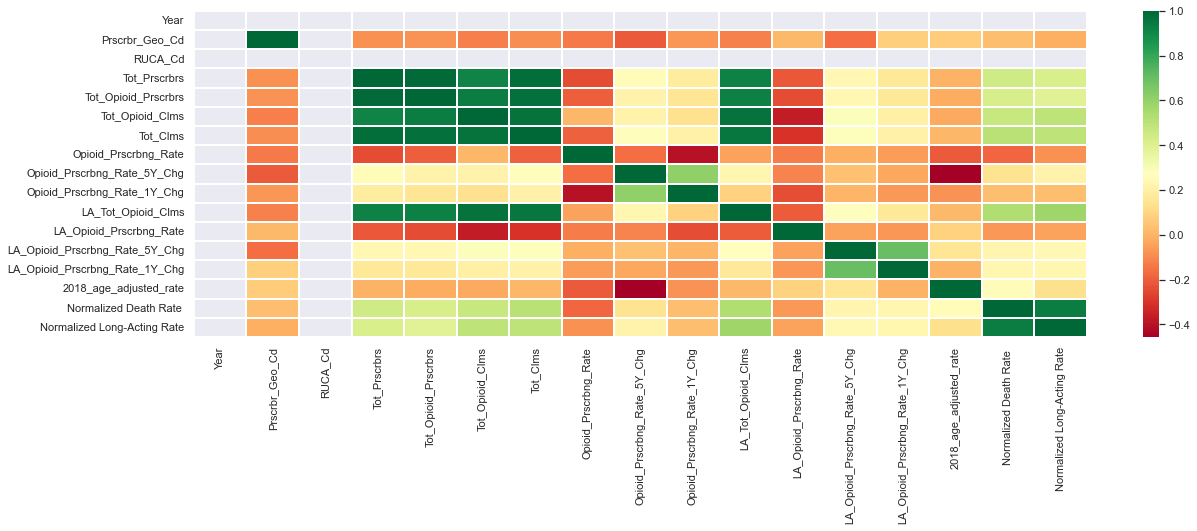

In [61]:
sns.heatmap(state_2018.corr(), cmap ='RdYlGn', linewidths = 0.30, annot = False)

In [62]:
kmeans = KMeans(n_clusters=3).fit(state_2018.values)
print(kmeans, "\n")
print(np.unique(kmeans.labels_, return_counts=True))
print(kmeans.cluster_centers_)
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])
print(kmeans_3)

ValueError: could not convert string to float: 'State'